In [1]:
from fastai.vision.all import *

In [2]:
def get_data_loader(image_path, mask_path):
    # 使用fastai的DataBlock API
    dblock = DataBlock(
        blocks=(ImageBlock, MaskBlock(
            codes=['background', 'class1', 'class2', 'class3'])),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.9, seed=42),
        get_y=lambda x: mask_path / f'{x.stem}.png',
        item_tfms=Resize(256),
        batch_tfms=aug_transforms(size=256)
    )
    return dblock.dataloaders(image_path, bs=16)


# 定义数据路径
image_path = Path('./data/images/training')
mask_path = Path('./data/annotations/training')

# 创建数据集
# 创建数据加载器
dls = get_data_loader(image_path, mask_path)

In [22]:
# 定义模型
learn = unet_learner(dls, resnet34, metrics=[Dice(), JaccardCoeffMulti()])

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 调试代码
xb, yb = dls.one_batch()
xb = xb.to(device)
yb = yb.to(device)
print(f"Input batch shape: {xb.shape}")
print(f"Target batch shape: {yb.shape}")
learn.model = learn.model.to(device)

preds = learn.model(xb)
print(f"Model output shape: {preds.shape}")

Input batch shape: torch.Size([16, 3, 256, 256])
Target batch shape: torch.Size([16, 256, 256])
Model output shape: torch.Size([16, 4, 256, 256])


In [24]:
# 训练模型
learn.fine_tune(10)

# 保存模型
learn.save('fastai_unet_model')

epoch,train_loss,valid_loss,dice,jaccard_coeff_multi,time
0,0.560247,0.307673,0.365922,0.264357,00:21


epoch,train_loss,valid_loss,dice,jaccard_coeff_multi,time


KeyboardInterrupt: 

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

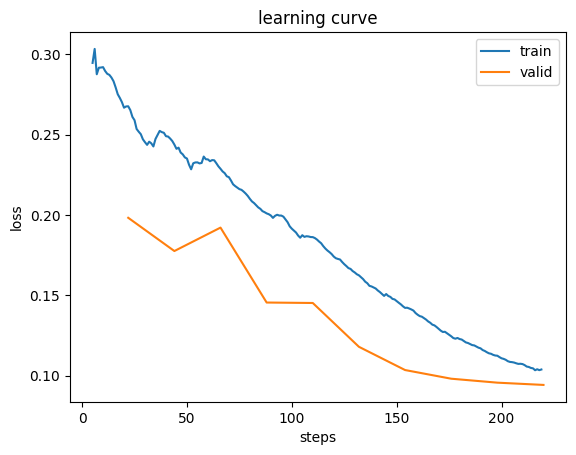

In [19]:
learn.recorder.plot_loss()

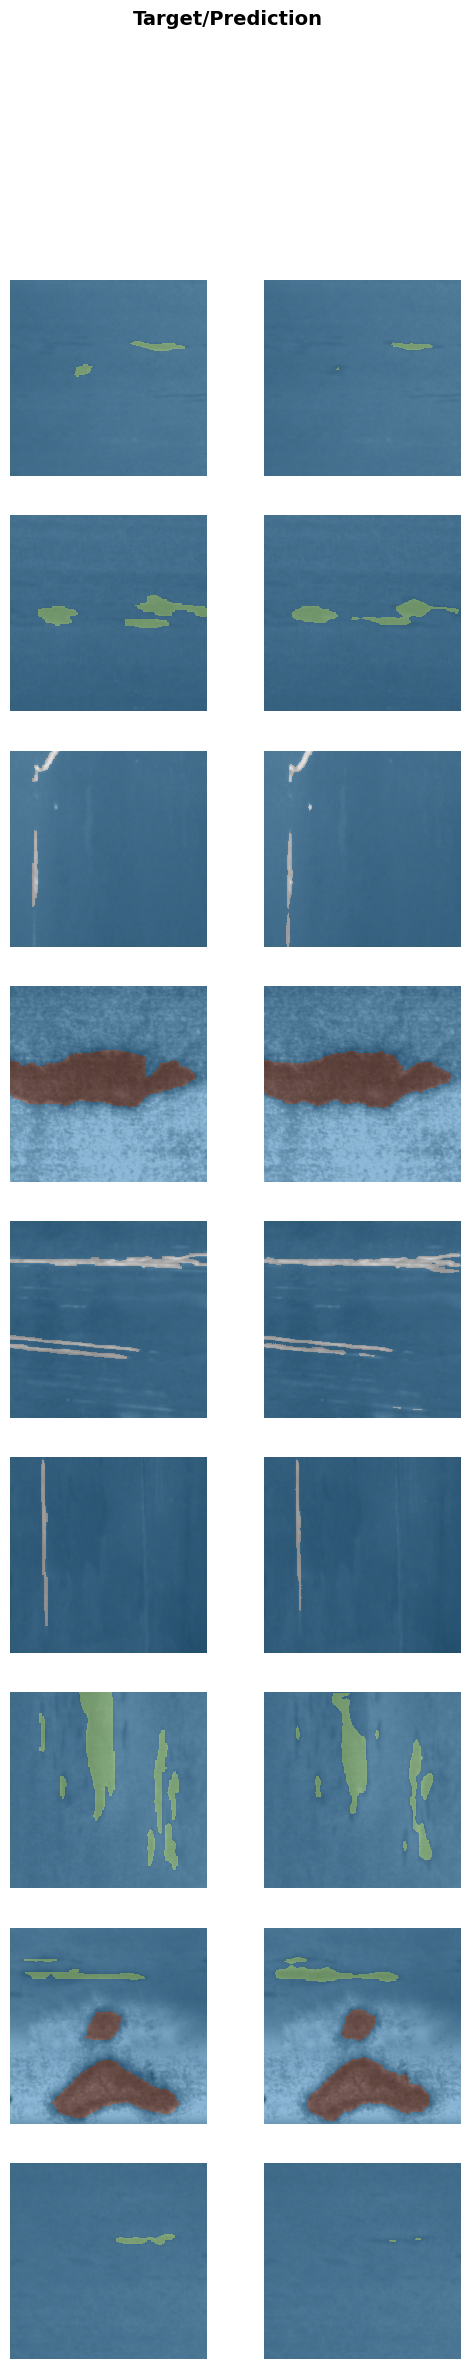

In [20]:
learn.show_results()